In [1]:
# importing useful libraries

import requests
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)

In [2]:
def download(url, file_name):
    """
    Downloads the dataset for project
    input:
    url (string): url for dataset
    file_name (string): file name in which downloaded dataset will be stored
    """
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.raw.read())

In [3]:
def extract_zip(s_path, d_path):
    """
    Extract (unzip) the compressed dataset for working
    input:
    s_path (string): path of zipped dataset
    d_path (string): path to store the unzipped dataset
    """
    with zipfile.ZipFile(s_path, 'r') as zip_ref:
        zip_ref.extractall(d_path)

In [4]:
def center_crop(image_path, size):
    """
    crop the image from center of the given size
    input:
    image_path (string): Path of image
    size (int): size to which the image being cropped from center
    """
    img = Image.open(image_path)
    img = img.resize((size+1,size+1))
    x_center = img.width/2
    y_center = img.height/2
    size = size/2
    cr = img.crop((x_center-size, y_center-size, x_center+size, y_center+size))

    return cr


In [5]:
photos_by_year={}
for y in range(2000,2023):
    try:
        photos_by_year[str(y)]= os.listdir(f"bibliotek/{y}")
    except:
        continue
        

In [10]:
one_photo = photos_by_year['2020'][0]
prefix = 'bibliotek/2020/'
one_photo

'IMG_4476_edited.jpeg'

In [11]:
img = Image.open(f"{prefix}{one_photo}")
img.format, type(img)

('MPO', PIL.MpoImagePlugin.MpoImageFile)

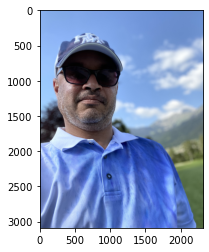

In [12]:
plt.imshow(img)

In [13]:
# define list of files
cat_list = os.listdir("images/cats")
dog_list = os.listdir("images/dogs")

FileNotFoundError: [Errno 2] No such file or directory: 'images/cats'

In [15]:
all_photos = []
# create dataset with all photos
for key in photos_by_year:
    list_of_year = photos_by_year[key]
    for i in list_of_year:
        all_photos.append(f"biliotek/{key}/{i}")
        
len(all_photos)
train_list=all_photos

In [17]:
np.random.shuffle(train_list)
try:
    train_list.remove('.ipynb_checkpoints')
    train_list.remove('.ipynb_checkpoints')
except:
    pass
train_list[:4]

['biliotek/2021/IMG_6333_edited.jpeg',
 'biliotek/2020/IMG_4525_edited.jpeg',
 'biliotek/2018/IMG_1660_edited.jpeg',
 'biliotek/2021/IMG_6548_edited.jpeg']

In [18]:
l=len(train_list)

In [19]:
train_data = np.zeros((l,100*100*3))

In [24]:
for key in photos_by_year:
    for image_name in photos_by_year[key]:
        image_path = f"bibliotek/{key}/{image_name}"
        try:
            crp_img = center_crop(image_path,100)
            crp_arr = np.array(crp_img).reshape(-1)
            train_data[i] = crp_arr
        except:
            continue

In [25]:
train_data[0]

array([116., 159., 227., ..., 195., 202.,  84.])

In [26]:
print("printing the name of some image")
print("-> ",train_list[0])
print("Splitting the image from all . characters into a list")
print("-> ",train_list[0].split("."))
print("selecting the 0th element of splitted list")
print("-> ",train_list[0].split("_")[0])

printing the name of some image
->  biliotek/2021/IMG_6333_edited.jpeg
Splitting the image from all . characters into a list
->  ['biliotek/2021/IMG_6333_edited', 'jpeg']
selecting the 0th element of splitted list
->  biliotek/2021/IMG


In [27]:
train_labels = np.array([0 if name.split("/")[1]=="2020" else 1 for name in train_list])

In [28]:
train_labels

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [29]:
model = LogisticRegression(max_iter=100, n_jobs=-1)

In [30]:
model.fit(train_data, train_labels)

LogisticRegression(n_jobs=-1)

In [31]:
model.score(train_data, train_labels)

0.7484536082474227

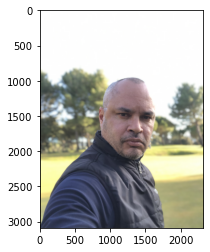

In [32]:
test_img = "./bibliotek/2019/IMG_2539_edited.jpeg"
img = Image.open(test_img)
plt.imshow(img)

In [33]:
im = center_crop(test_img,100) # cropping image
X = np.array(im).reshape(-1) # flattening the image to pass in model for prediction
X = X/255 # scale the pixels in 0-1 range

In [34]:
model.predict([X])

array([1])

In [35]:
train_pred = model.predict(train_data)
cm = confusion_matrix(train_pred, train_labels)
cm

array([[  0,   0],
       [122, 363]])

<AxesSubplot:>

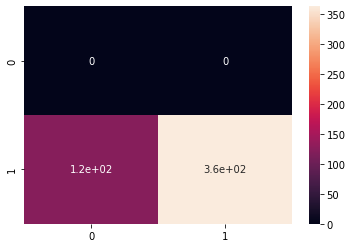

In [36]:
sns.heatmap(cm, annot=True)

In [37]:
def show_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)

In [38]:
def predict_custom_image(model, img_path):
    crp_img = center_crop(img_path,100)
    crp_arr = np.array(crp_img).reshape(1,-1)
    pred = model.predict(crp_arr)
    proba = model.predict_proba(crp_arr)
    if pred == 0:
        return "Cat", proba
    return "Dog", np.round(proba,4)


In [40]:
len(train_data)

485

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data)

/var/folders/nn/fc05h9652z16vkxq7x5q5klw0000gn/T/ipykernel_21491/225315272.py:2: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=10, random_state=0).fit(train_data)


In [44]:
kmeans.predict(train_data)

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,